In [38]:
%matplotlib inline


from time import time
from math import sqrt, floor
import numpy as np
import pandas as pd
from IPython.core.debugger import set_trace
pd.options.display.float_format = '{:.3f}'.format

from sklearn.metrics import mean_squared_error as MSE

import matplotlib.pyplot as plt
plt.style.use = "default"

import sys
sys.path.append('../../')
from predict_missing_values import predict_missing_values

import warnings
warnings.filterwarnings(action='once')

In [2]:
data = pd.read_csv("MissingData1.txt", sep='\t', header=None)

In [3]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,242.000,242.000,242.000,242.000,242.000,242.000,242.000,242.000,242.000,242.000,242.000,242.000,242.000,242.000
mean,33057851239669419812011956975434713671456413592...,45454545454545456510076018485646959392773360050...,20661157024793386908223075593599559589713503899...,28925619834710744706932449933741056737258134871...,45454545454545456510076018485646959392773360050...,37190082644628098711366644145505462245228729078...,28925619834710744706932449933741056737258134871...,37190082644628098711366644145505462245228729078...,24793388429752065807577762763670308163485819385...,28925619834710744706932449933741056737258134871...,49586776859504131615155525527340616326971638771...,41322314049586773816446151187199119179427007799...,41322314049586773816446151187199119179427007799...,24793388429752065807577762763670308163485819385...
std,17915821133606912691359300289257616637382852413...,20873060324324858375694638654940123419108016279...,14254204031354055834784264429424876312380579047...,16794487167464622577982199899053333703232283799...,20873060324324861411114782757641796730767245691...,18961950606322440023102509905082700334966243255...,16794487167464622577982199899053333703232283799...,18961950606322440023102509905082700334966243255...,15581720950422172076418291658936430342443148801...,16794487167464619542562055796351660391573054387...,21753960556734986632199849390128177375958159816...,19944712856639012216617901891523415552344040923...,19944712856639012216617901891523415552344040923...,15581720950422172076418291658936430342443148801...
min,-1.390,-0.840,-1.490,-0.900,-1.130,-1.210,-1.040,-0.600,-0.660,-1.130,-1.180,-0.790,-1.340,-0.490
25%,-0.210,-0.217,-0.160,-0.180,-0.180,-0.228,-0.158,-0.090,-0.117,-0.170,-0.160,-0.140,-0.270,-0.088
50%,0.190,-0.040,-0.020,0.010,0.015,-0.025,-0.010,0.030,0.020,-0.010,-0.020,0.010,-0.070,0.070
75%,0.570,0.160,0.120,0.220,0.245,0.150,0.150,0.180,0.198,0.150,0.130,0.217,0.160,0.190
max,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...


In [5]:
without = data[data < data.mean()]
missing = data[data > data.mean()]

In [6]:
without.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,234.000,231.000,237.000,235.000,231.000,233.000,235.000,233.000,236.000,235.000,230.000,232.000,232.000,236.000
mean,0.160,-0.039,-0.018,0.007,-0.015,-0.075,-0.034,0.030,0.034,-0.020,-0.033,0.009,-0.073,0.057
std,0.610,0.335,0.293,0.302,0.349,0.339,0.288,0.220,0.228,0.249,0.242,0.279,0.345,0.222
min,-1.390,-0.840,-1.490,-0.900,-1.130,-1.210,-1.040,-0.600,-0.660,-1.130,-1.180,-0.790,-1.340,-0.490
25%,-0.210,-0.240,-0.160,-0.195,-0.185,-0.230,-0.170,-0.090,-0.120,-0.170,-0.160,-0.143,-0.273,-0.090
50%,0.145,-0.050,-0.030,-0.010,0.000,-0.040,-0.010,0.030,0.015,-0.010,-0.030,-0.010,-0.080,0.065
75%,0.495,0.100,0.110,0.210,0.185,0.120,0.140,0.160,0.190,0.140,0.100,0.182,0.133,0.190
max,1.970,1.670,1.240,0.810,1.090,0.870,1.090,0.560,0.660,0.570,1.590,0.780,1.510,0.870


In [7]:
missing.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,8.000,11.000,5.000,7.000,11.000,9.000,7.000,9.000,6.000,7.000,12.000,10.000,10.000,6.000
mean,99999999999999996733616880411669127384953318580...,10000000000000000887529745682247582063159023622...,99999999999999996733616880411669127384953318580...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,99999999999999996733616880411669127384953318580...,10000000000000000887529745682247582063159023622...,99999999999999996733616880411669127384953318580...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,99999999999999996733616880411669127384953318580...,99999999999999996733616880411669127384953318580...,10000000000000000887529745682247582063159023622...
std,12980002519022052382171437510357718966776234492...,0.000,13574811564971697305893868978198254453654371106...,0.000,0.000,12878197005871604620438111148201495257131271969...,0.000,12878197005871604620438111148201495257131271969...,0.000,0.000,0.000,12798455081228075789973773165264248735760776190...,12798455081228075789973773165264248735760776190...,0.000
min,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...
25%,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...
50%,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...
75%,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,1000000000000000088752974

In [8]:
without[0].describe()

count   234.000
mean      0.160
std       0.610
min      -1.390
25%      -0.210
50%       0.145
75%       0.495
max       1.970
Name: 0, dtype: float64

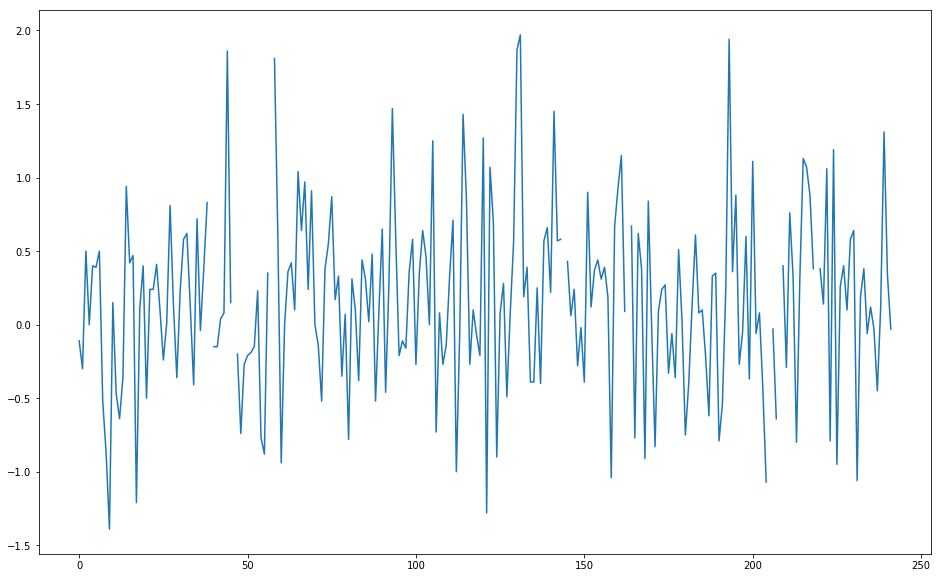

In [9]:
without[0].plot.line(figsize=(16,10))

Maybe for the missing points that have a lot of points before na ater it, we can estimate the slope of the line around the missing point and find the point through that equation

In [10]:
missing[0].dropna().index

Int64Index([39, 46, 57, 144, 163, 205, 208, 219], dtype='int64')

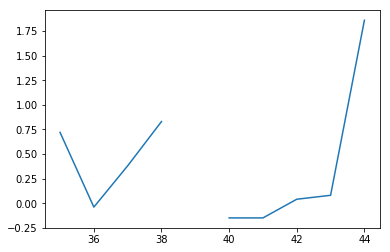

In [11]:
without[0][35:45].plot.line()

In [12]:
without[0][38], without[0][40]

(0.83, -0.15)

In [13]:
def slope(x1, y1, x2, y2):
    return (y1 - y2) / (x1 - x2)

def find_y(x_to_find, slope, x1, y1):
    return slope * (x_to_find - x1) + y1

m1_slope = slope(38, .83, 40, -.15)
m1_slope

-0.49

In [14]:
without[0][39] = find_y(39, m1_slope, 38, .83)

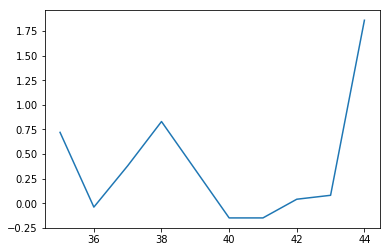

In [15]:
without[0][35:45].plot.line()

This seems to be a viable solution - lets see what other cases look like in the dataset.

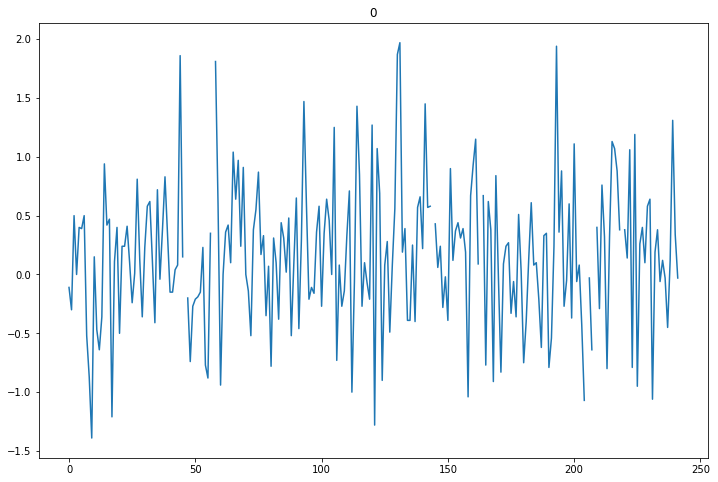

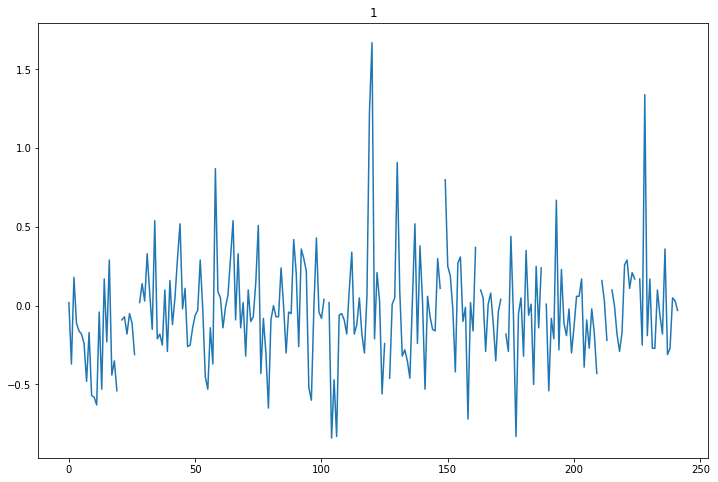

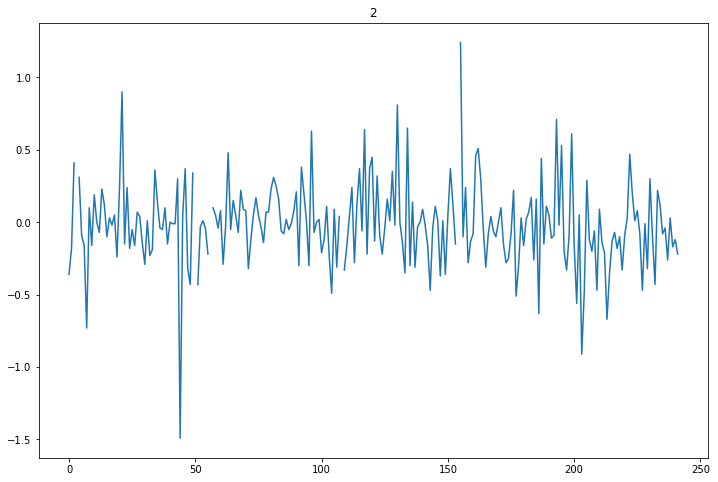

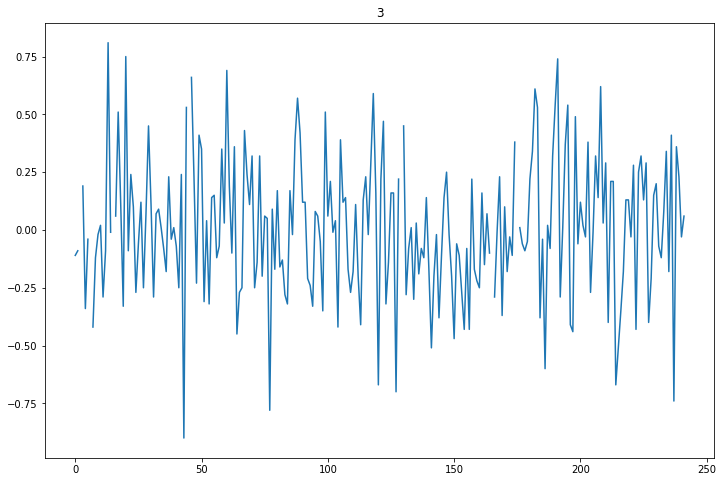

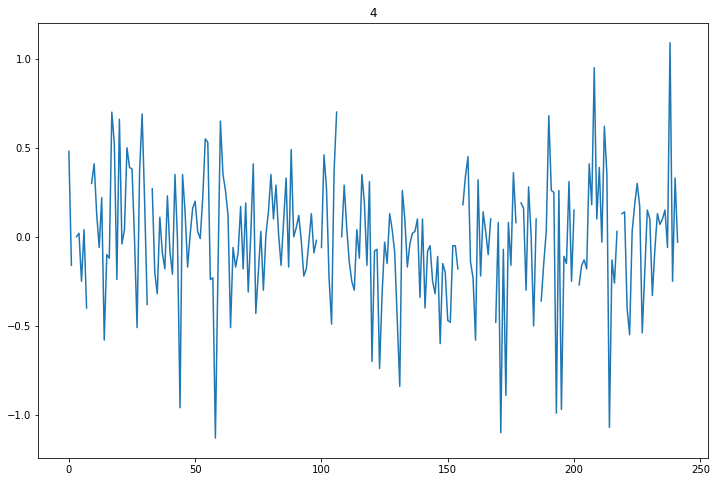

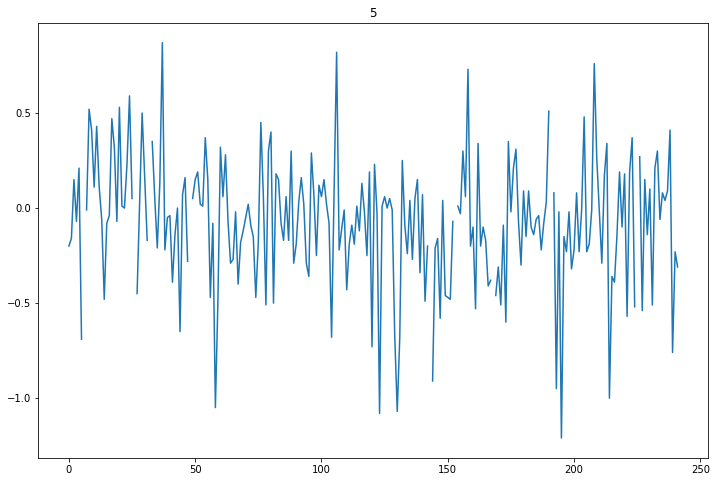

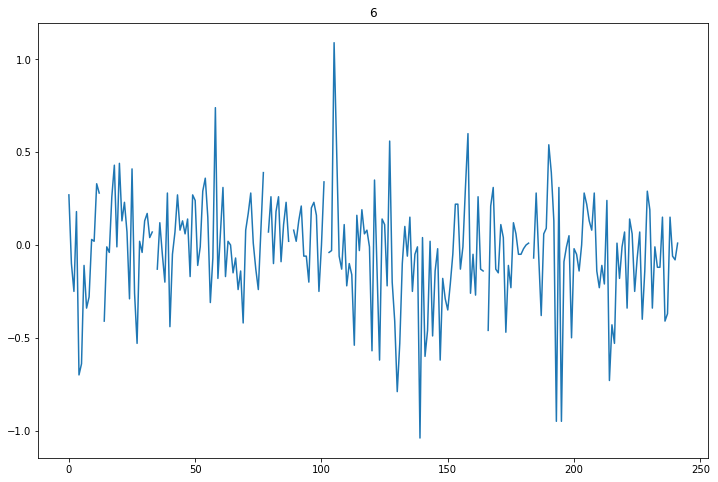

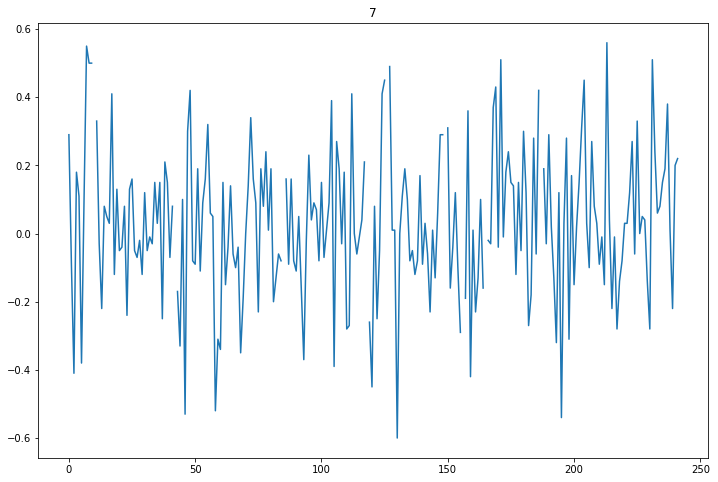

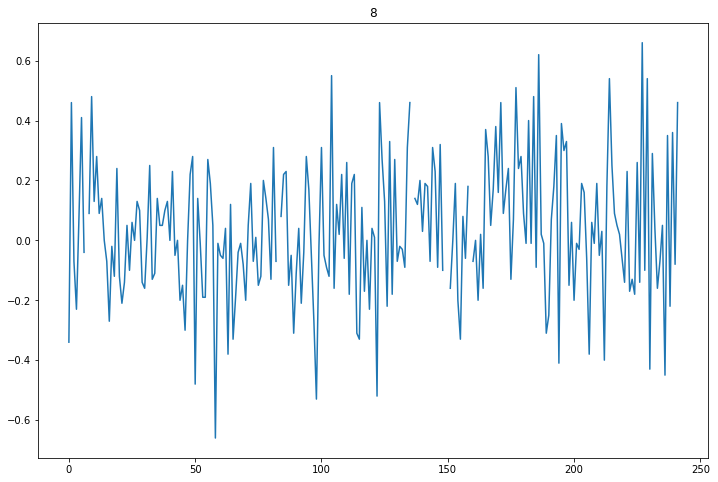

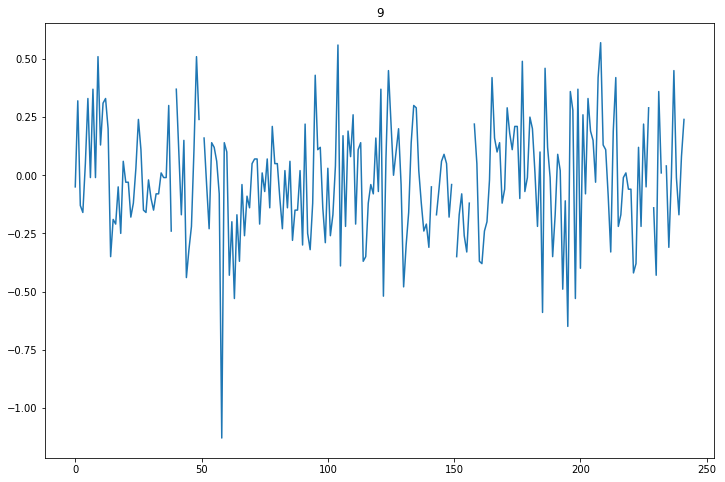

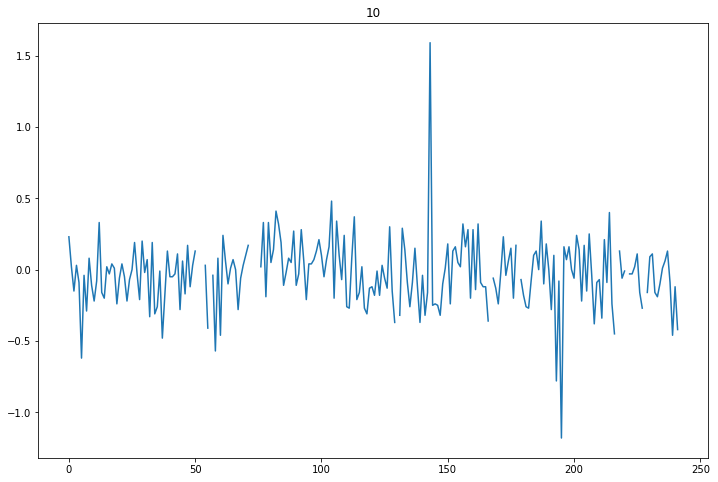

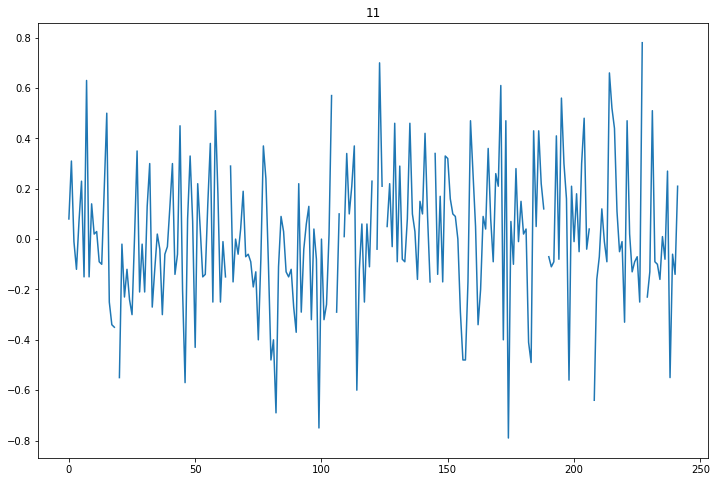

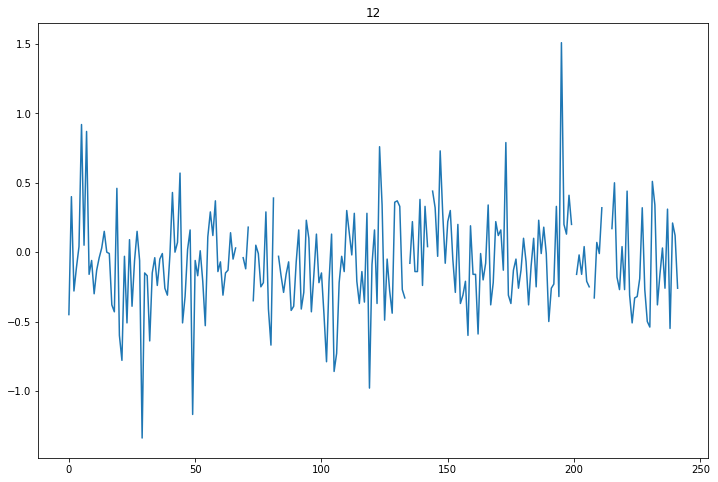

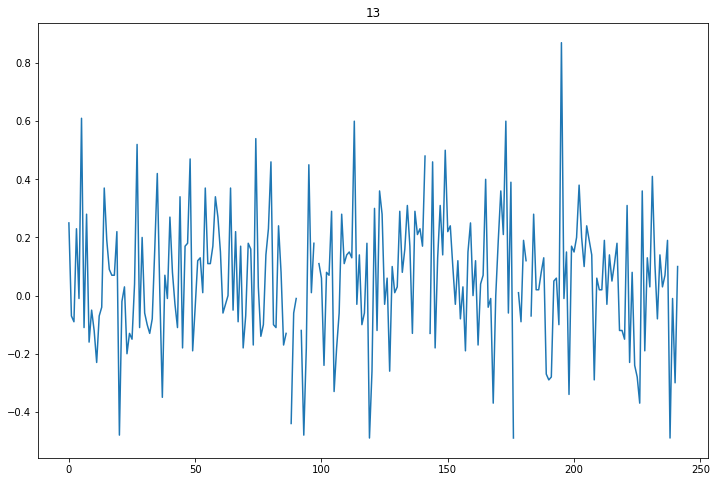

In [16]:
for c in without.columns:
    without[c].plot.line(figsize=(12, 8))
    plt.title(c)
    plt.show()

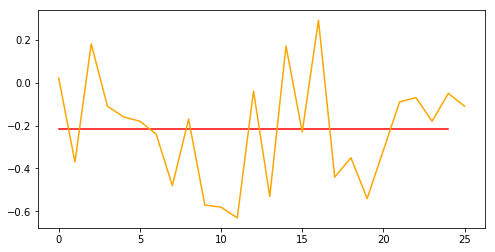

In [17]:
r = np.r_[range(0,20), range(21, 26)]
gen = without[1].iloc[r]
plt.plot(range(gen.size), np.repeat(np.mean(gen), gen.size), color="r")
gen.plot.line(color="orange", figsize=(8,4))

We can start our investigation of which power best estimates the given plot without overfitting by using [Descarte's rule of signs](https://en.wikipedia.org/wiki/Descartes%27_rule_of_signs). We'll make origin the mean and then see how many roots the plot has - that should be a good starting point for what the power should be.

In [18]:
# checks every pair and compares the each point to see if the mean is between the two. If it is, we've found a root
roots = gen.rolling(window=2).apply(lambda x: (x[0] > gen.mean() and x[1] < gen.mean()) or (x[0] < gen.mean() and x[1] > gen.mean())).dropna()
roots = roots[roots > 0].size

0.026906767266799747
-0.31309833172687584


(-0.63, 0.29)

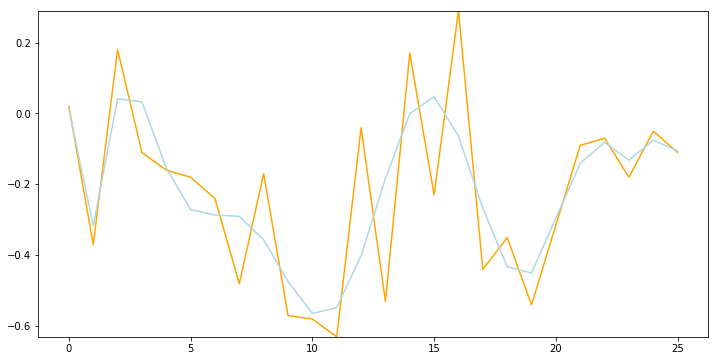

In [19]:
plt.figure(figsize=(12,6))

gen.plot.line(color="orange")

est_f = np.poly1d(np.polyfit(r, gen.values, roots))
est_v = [est_f(i) for i in r]
plt.plot(r, est_v, color="lightblue")

print(MSE(est_v, gen))
print(est_f(20))

plt.ylim((min(gen), max(gen)))

Given the nature of the powers of polynomial, choosing the right power could be tricky. There might be a local optimum given by the power we choose that we can solve for to get the best prediction for the point. Let's try them and see if we can make an algorithm.

/usr/local/Cellar/python3/3.5.0/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """


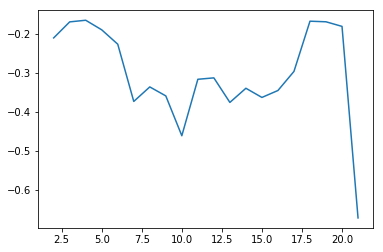

In [20]:
r1 = np.r_[range(0,20), range(21,26)]
power = range(roots-10,roots+10)

g1 = without[1].iloc[r1]
p = [np.poly1d(np.polyfit(r1, g1.values, i))(20) for i in power]
np.mean(p)
plt.plot(power, p)

It seems like this is indeed the case. Let's take the average of the averages of the different ranges of roots and use that as our prediction.

In [21]:
preds = []
for i in range(1, int(roots/2)):
    power = range(roots-i,roots+i)
    p = [np.poly1d(np.polyfit(r1, g1.values, i))(20) for i in power]
    preds.append(np.mean(p))

polyfit_pred = np.mean(preds)
polyfit_pred

-0.3518084454237976

To prevent overfitting, we can create a [naive model](https://machinelearningmastery.com/moving-average-smoothing-for-time-series-forecasting-python/) and take the weighted average of it and the polynomial's prediction. A [moving](https://analysights.wordpress.com/2010/05/06/forecast-friday-topic-moving-average-methods-2/) [average](https://www.itl.nist.gov/div898/handbook/pmc/section4/pmc42.htm) [model](https://www.dallasfed.org/research/basics/moving.aspx) seems like a good choice given the kind and shape of our data. It takes advantageg [of](https://stackoverflow.com/questions/20618804/how-to-smooth-a-curve-in-the-right-way) [smoothing](https://machinelearningmastery.com/moving-average-smoothing-for-time-series-forecasting-python/) by taking the average of a specified window of values in order to predict the next value.

![moving average formula](https://www.dallasfed.org/-/media/Images/research/basics/movingeq1.png?la=en)

0.03882083333333333


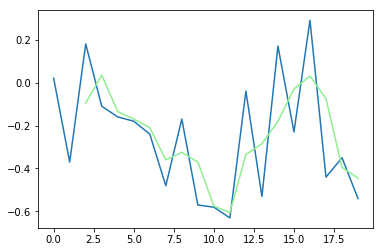

In [22]:
window = 2
p1 = without[1][:20]
p1_smooth = p1.rolling(window=window).mean()[window:]

print(MSE(p1[p1.size-p1_smooth.size:], p1_smooth))

p1.plot.line()
p1_smooth.plot.line(c="lightgreen")

In [23]:
p1_smooth.loc[20] = np.mean(p1_smooth.iloc[-window])

In [24]:
ma_pred = p1_smooth.loc[20]

In [25]:
np.average([polyfit_pred, ma_pred], weights=[1.5, 1])

-0.3690850672542786

And just like that, we have our algorithm! 
1. For each column, find the number of _"mean-roots"_
2. For each missing value in the column:
    1. take all the numbers before it and the ones after until the next missing value
    2. compute the missing value using the average prediction of a range of polynomial fits
    3. compute the missing value using a moving average model
    4. take the weighted average, favoring the polynomial prediction, of both predictions

In [29]:
d2 = predict_missing_values(data)

/usr/local/Cellar/python3/3.5.0/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:9: RankWarning: Polyfit may be poorly conditioned
  if __name__ == '__main__':
/usr/local/Cellar/python3/3.5.0/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/numpy/lib/polynomial.py:583: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))


***********************

Done!

***********************



In [37]:
d2.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,242.000,242.000,242.000,242.000,242.000,242.000,242.000,242.000,242.000,242.000,242.000,242.000,242.000,242.000
mean,0.153,-0.048,-0.023,0.002,-0.023,-0.087,-0.040,0.021,0.029,-0.026,-0.042,0.000,-0.080,0.051
std,0.603,0.330,0.292,0.299,0.343,0.338,0.286,0.221,0.227,0.248,0.239,0.277,0.340,0.223
min,-1.390,-0.840,-1.490,-0.900,-1.130,-1.210,-1.040,-0.600,-0.660,-1.130,-1.180,-0.790,-1.340,-0.490
25%,-0.232,-0.242,-0.178,-0.180,-0.195,-0.278,-0.200,-0.120,-0.130,-0.179,-0.189,-0.150,-0.270,-0.100
50%,0.145,-0.065,-0.035,-0.015,-0.020,-0.060,-0.020,0.010,0.005,-0.030,-0.045,-0.015,-0.115,0.060
75%,0.467,0.100,0.100,0.198,0.178,0.108,0.130,0.158,0.190,0.130,0.100,0.168,0.128,0.180
max,1.970,1.670,1.240,0.810,1.090,0.870,1.090,0.560,0.660,0.570,1.590,0.780,1.510,0.870


In [34]:
d2.to_csv("filledData.txt", sep="\t", index=False, header=False)